In [1]:
import pandas as pd
from sklearn.decomposition import PCA, KernelPCA

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
df = pd.read_csv('./creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [5]:
import seaborn as sns

<AxesSubplot:>

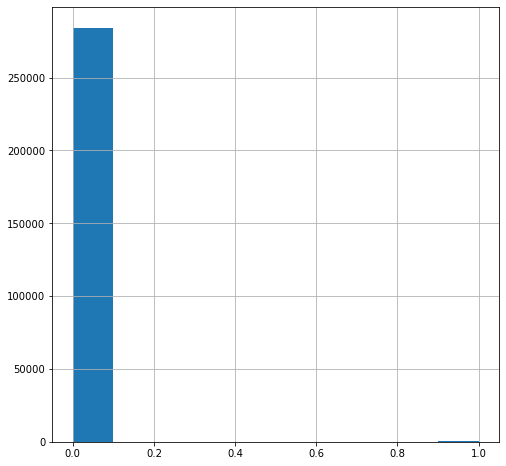

In [8]:
figure(figsize=(8, 8))
df['Class'].hist()

/home/manan/miniconda3/envs/main/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount', ylabel='Density'>

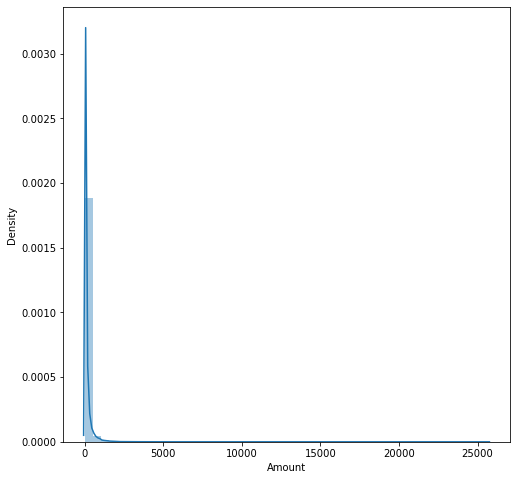

In [9]:
figure(figsize=(8, 8))

sns.distplot(df['Amount'])

# Check for nulls

In [46]:
(df.isna() == True).sum() / len(df)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

# Data Analysis

In [75]:
(df['Class'] == 1).sum(), (df['Class'] == 0).sum()

(492, 284315)

In [17]:
df_ = df[df['Class'] == 1].sort_values(by='Time')

In [18]:
intervals = []
for i in range(1, len(df_)):
    intervals.append(df_.iloc[i]['Time'] - df_.iloc[i - 1]['Time'])

Text(0, 0.5, 'Time difference')

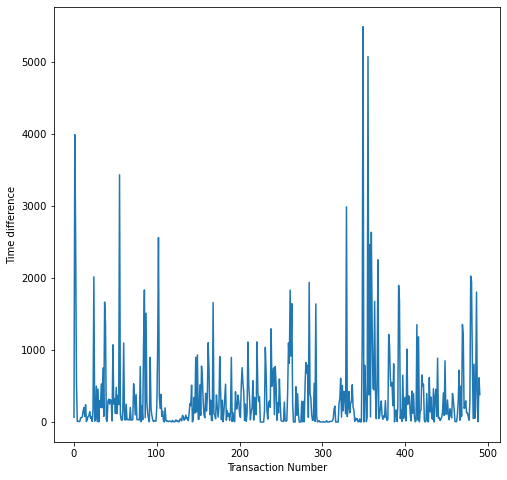

In [20]:
figure(figsize=(8, 8) )
plot(intervals)
xlabel('Transaction Number')
ylabel('Time difference')

# Perform dimensionality reduction and check for spatial seperation between the classes

In [47]:
df['Amount'] = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()

In [54]:
X = []
y = []
for i, row in df.iterrows():
    time = row[0]
    label = row[-1]
    features = row[1:-1]
    X.append(features)
    y.append(label)
X = array(X)
y = array(y)

In [55]:
pca = PCA(n_components=2)
X_prime = pca.fit_transform(X)

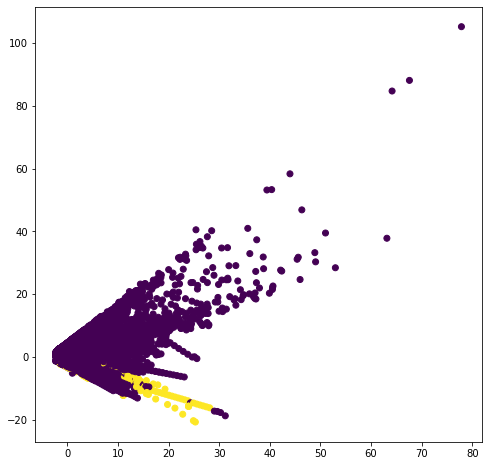

In [64]:
figure(figsize=(8, 8))
scatter(X_prime[:, 0], X_prime[:, 1], c=(y + 1))

There is no clear spatial distinction between the two classes

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True)

# Classifiers

In [101]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

clf = {
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=40, n_jobs=-1)
}

In [102]:
for key, val in clf.items():
    val.fit(X_train, y_train)

In [103]:
for key, val in clf.items():
    print(key)
    preds = val.predict(X_test)
    print(classification_report(preds, y_test))

Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28443
         1.0       0.85      0.76      0.81        38

    accuracy                           1.00     28481
   macro avg       0.93      0.88      0.90     28481
weighted avg       1.00      1.00      1.00     28481

Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     28448
         1.0       0.85      0.88      0.87        33

    accuracy                           1.00     28481
   macro avg       0.93      0.94      0.93     28481
weighted avg       1.00      1.00      1.00     28481



# Negative Samples Undersampling

In [127]:
undersampled0 = df[df['Class'] == 0].sample(1000)
undersampled1 = df[df['Class'] == 1]

remaining0 = pd.concat((df[df['Class'] == 0], undersampled0)).drop_duplicates()

In [129]:
df_train = pd.concat((undersampled0.iloc[:900], undersampled1.iloc[:450]))
df_test = pd.concat((remaining0, undersampled1.iloc[450:]))

In [130]:
df_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342474,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160684,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,1.206022,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,-0.350190,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,-0.041818,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,0.626301,1


In [137]:
X_train = []
y_train = []
for i, row in df_train.iterrows():
    time = row[0]
    label = row[-1]
    features = row[1:-1]
    X_train.append(features)
    y_train.append(label)
X_train = array(X_train)
y_train = array(y_train)

In [138]:
X_test = []
y_test = []
for i, row in df_test.iterrows():
    time = row[0]
    label = row[-1]
    features = row[1:-1]
    X_test.append(features)
    y_test.append(label)
X_test = array(X_test)
y_test = array(y_test)

In [139]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

clf = {
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=40, n_jobs=-1)
}

In [140]:
for key, val in clf.items():
    val.fit(X_train, y_train)

In [145]:
(y_test == 0).sum()

283253

In [147]:
for key, val in clf.items():
    print(key)
    preds = val.predict(X_test)
    print(classification_report(y_test, preds))

Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      0.95      0.97    283253
         1.0       0.00      0.81      0.00        42

    accuracy                           0.95    283295
   macro avg       0.50      0.88      0.49    283295
weighted avg       1.00      0.95      0.97    283295

Random Forest
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00    283253
         1.0       0.02      0.79      0.03        42

    accuracy                           0.99    283295
   macro avg       0.51      0.89      0.51    283295
weighted avg       1.00      0.99      1.00    283295

